In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv ("23qs.csv")

In [5]:
df.head()

,Rank,Institution,LocationCode,Location,ArScore,ArRank,ErScore,ErRank,FsrScore,FsrRank,...,CpfRank,IfrScore,IfrRank,IsrScore,IsrRank,IrnScore,IrnRank,GerScore,GerRank,ScoreScaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4
4,5,Harvard University,US,United States,100.0,1,100.0,1,99.4,35,...,2,76.9,228,66.9,212,100.0,1,100.0,1,97.6


In [7]:
df.rename(columns = str.lower, inplace = True)
df.columns

Index(['rank', 'institution', 'locationcode', 'location', 'arscore', 'arrank',
       'erscore', 'errank', 'fsrscore', 'fsrrank', 'cpfscore', 'cpfrank',
       'ifrscore', 'ifrrank', 'isrscore', 'isrrank', 'irnscore', 'irnrank',
       'gerscore', 'gerrank', 'scorescaled'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          1422 non-null   int64  
 1   institution   1422 non-null   object 
 2   locationcode  1422 non-null   object 
 3   location      1422 non-null   object 
 4   arscore       1422 non-null   float64
 5   arrank        1422 non-null   object 
 6   erscore       1421 non-null   float64
 7   errank        1422 non-null   object 
 8   fsrscore      1420 non-null   float64
 9   fsrrank       1422 non-null   object 
 10  cpfscore      1417 non-null   float64
 11  cpfrank       1422 non-null   object 
 12  ifrscore      1324 non-null   float64
 13  ifrrank       1324 non-null   object 
 14  isrscore      1365 non-null   float64
 15  isrrank       1365 non-null   object 
 16  irnscore      1409 non-null   float64
 17  irnrank       1409 non-null   object 
 18  gerscore      1410 non-null 

In [9]:
df.isna().sum()

rank             0
institution      0
locationcode     0
location         0
arscore          0
arrank           0
erscore          1
errank           0
fsrscore         2
fsrrank          0
cpfscore         5
cpfrank          0
ifrscore        98
ifrrank         98
isrscore        57
isrrank         57
irnscore        13
irnrank         13
gerscore        12
gerrank         12
scorescaled      0
dtype: int64

In [10]:
df.fillna(value= "no-info", inplace = True)

In [11]:
df.shape

(1422, 21)

In [12]:
df.drop_duplicates(subset = "rank",
                    keep = False,
                    inplace= True)

In [13]:
df.shape

(1422, 21)

In [14]:
top_400_QS = df.head(400)

In [15]:
top_100_QS = df.head(100)

In [16]:
top_10_QS = df.head(10)

In [25]:
countries = df.groupby("location") \
    .agg({"location" : "count"}) \
    .rename(columns = {"location" : "number-of-universities"}) \
    .sort_values(by = "number-of-universities" ,
                         ascending = False ) \
    .head(10) \
    .reset_index()


In [26]:
countries

,location,number-of-universities
0,United States,201
1,United Kingdom,90
2,China (Mainland),71
3,Japan,50
4,Russia,48
5,Germany,46
6,India,41
7,South Korea,41
8,Italy,41
9,Australia,38


In [29]:
#display the values on a seaborn barplot
def show_values(axs, orient = 'v', space=.1):
    def _single(ax):
        if orient == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height() * 0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha = 'center') 
        elif orient == 'h':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height() * 0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha = 'left')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

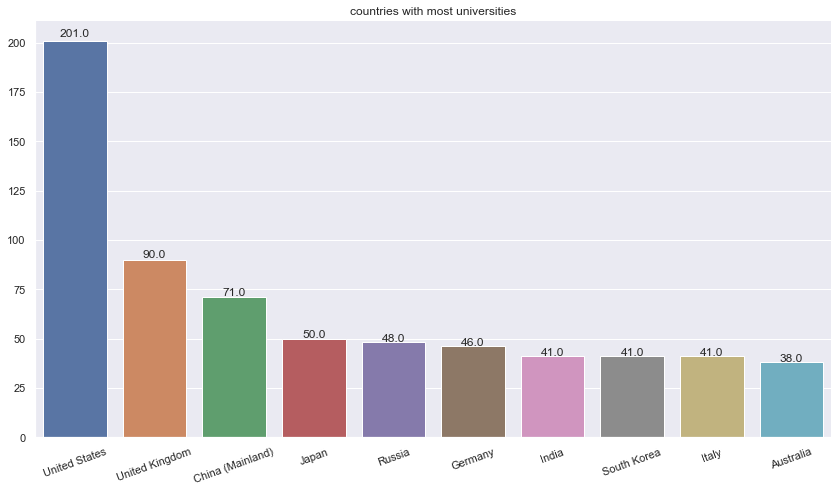

In [30]:
sns.set(rc = {"figure.figsize" : (12,7) }, font_scale = 1)
universities_by_country_graph = sns.barplot(data = countries,
                            x = "location" , 
                            y = "number-of-universities")
plt.xticks(rotation = 20)
plt.tight_layout()
plt.xlabel("")
plt.ylabel("")
plt.title("countries with most universities")


show_values(universities_by_country_graph)
sns.despine()


Text(0.5, 1.0, 'Percentage of universties QS 2023')

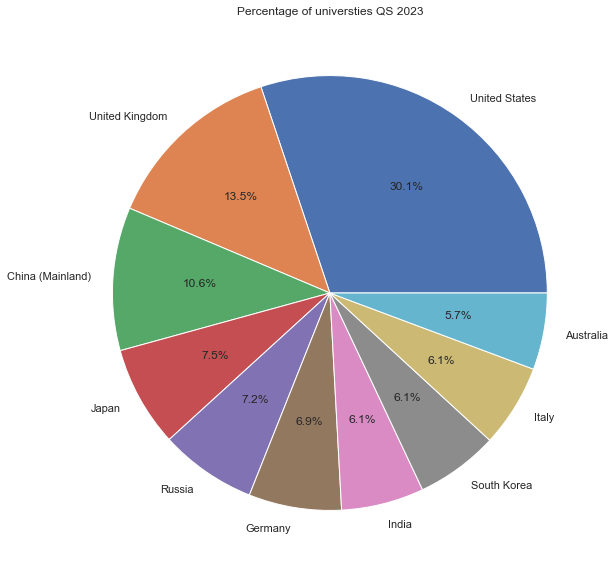

In [32]:
countries.set_index('location').plot(kind = 'pie', 
                                                     y = 'number-of-universities', 
                                                     autopct='%.1f%%', figsize = (10,10), 
                                                     legend = None)
plt.ylabel('')
plt.title('Percentage of universties QS 2023')

As we can see Most universities are from the US